In [45]:
import json
from itertools import combinations
import graph_tool.all as gt

In [40]:
def extract_lcc(g, directed=False, prune=True):
    g = gt.GraphView(g, vfilt=gt.label_largest_component(g, directed=directed))
    return gt.Graph(g, prune=prune)

In [43]:
filename = "output/links.json"
with open(filename, "rt") as f:
    data = f.read()
    links = json.loads(data)

In [44]:
links

[['%', 'Pelicans'],
 ['%', 'energy'],
 ['%', 'gliding'],
 ['%', 'habitat'],
 ['%', 'mainland'],
 ['%', 'pelican'],
 ['-', 'American'],
 ['-', 'Bay'],
 ['-', 'Jesse'],
 ['-', 'Lights'],
 ['-', 'Mexico'],
 ['-', 'Southern'],
 ['-', 'U'],
 ['-', 'able'],
 ['-', 'air'],
 ['-', 'anti'],
 ['-', 'appetite'],
 ['-', 'aquatic'],
 ['-', 'bank'],
 ['-', 'barnacle'],
 ['-', 'bend'],
 ['-', 'bill'],
 ['-', 'bill'],
 ['-', 'bird'],
 ['-', 'bird'],
 ['-', 'bone'],
 ['-', 'bone'],
 ['-', 'broadcast'],
 ['-', 'capybara'],
 ['-', 'catcher'],
 ['-', 'cattle'],
 ['-', 'check'],
 ['-', 'clay'],
 ['-', 'co'],
 ['-', 'coagulant'],
 ['-', 'continuous'],
 ['-', 'cross'],
 ['-', 'cross'],
 ['-', 'cross'],
 ['-', 'cross'],
 ['-', 'darkness'],
 ['-', 'day'],
 ['-', 'death'],
 ['-', 'difference'],
 ['-', 'emperor'],
 ['-', 'equipment'],
 ['-', 'female'],
 ['-', 'feverish'],
 ['-', 'first'],
 ['-', 'flight'],
 ['-', 'flight'],
 ['-', 'flock'],
 ['-', 'flock'],
 ['-', 'fly'],
 ['-', 'fuel'],
 ['-', 'geese'],
 ['-', 

In [7]:
filename = "output/birds.json"
with open(filename, "rt") as f:
    data = f.read()
    birds = json.loads(data)

In [16]:
links_bird = [link for link in links if link[0] in birds.keys()]

In [32]:
links_distinct = dict()
for link in links_bird:
    lk = (link[0], link[1])
    if lk in links_distinct.keys():
        links_distinct[lk] =+ 1
    else:
        links_distinct[lk] = 1

In [36]:
edge_list = [[key[0], key[1], value] for key, value in links_distinct.items()]

In [68]:
g = gt.Graph()
is_bipartite, part = gt.is_bipartite(g, partition=True)
eweight = g.new_ep("int")
g.add_edge_list(edge_list, hashed=True, eprops=[eweight])
g.ep['weight'] = eweight
# g = extract_lcc(g, prune=True)

Project bipartite network

In [63]:
{v: bipartite_label for v, bipartite_label in enumerate(part)}

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0,
 40: 0,
 41: 0,
 42: 0,
 43: 0,
 44: 0,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0,
 51: 0,
 52: 0,
 53: 0,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 0,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 0,
 66: 0,
 67: 0,
 68: 0,
 69: 0,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: 0,
 85: 0,
 86: 0,
 87: 0,
 88: 0,
 89: 0,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 0,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 0,
 102: 0,
 103: 0,
 104: 0,
 105: 0,
 106: 0,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 0,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 0,
 117: 0,
 118: 0,
 119: 0,
 120: 0,
 121: 0,
 122: 0,
 12

In [60]:
g_temp = g.copy()  # this is a deepcopy

for v, bipartite_label in enumerate(part):
    if bipartite_label == 0:
        neighbours = list(g.vertex(v).all_neighbours())

        for s, t in combinations(neighbours, 2):
            g_temp.add_edge(s, t)

g_projected = gt.Graph(gt.GraphView(g_temp, vfilt=part.a==1), prune=True)

In [61]:
g_projected

<Graph object, directed, with 0 vertices and 0 edges, 1 internal edge property, at 0x297ad66a0>

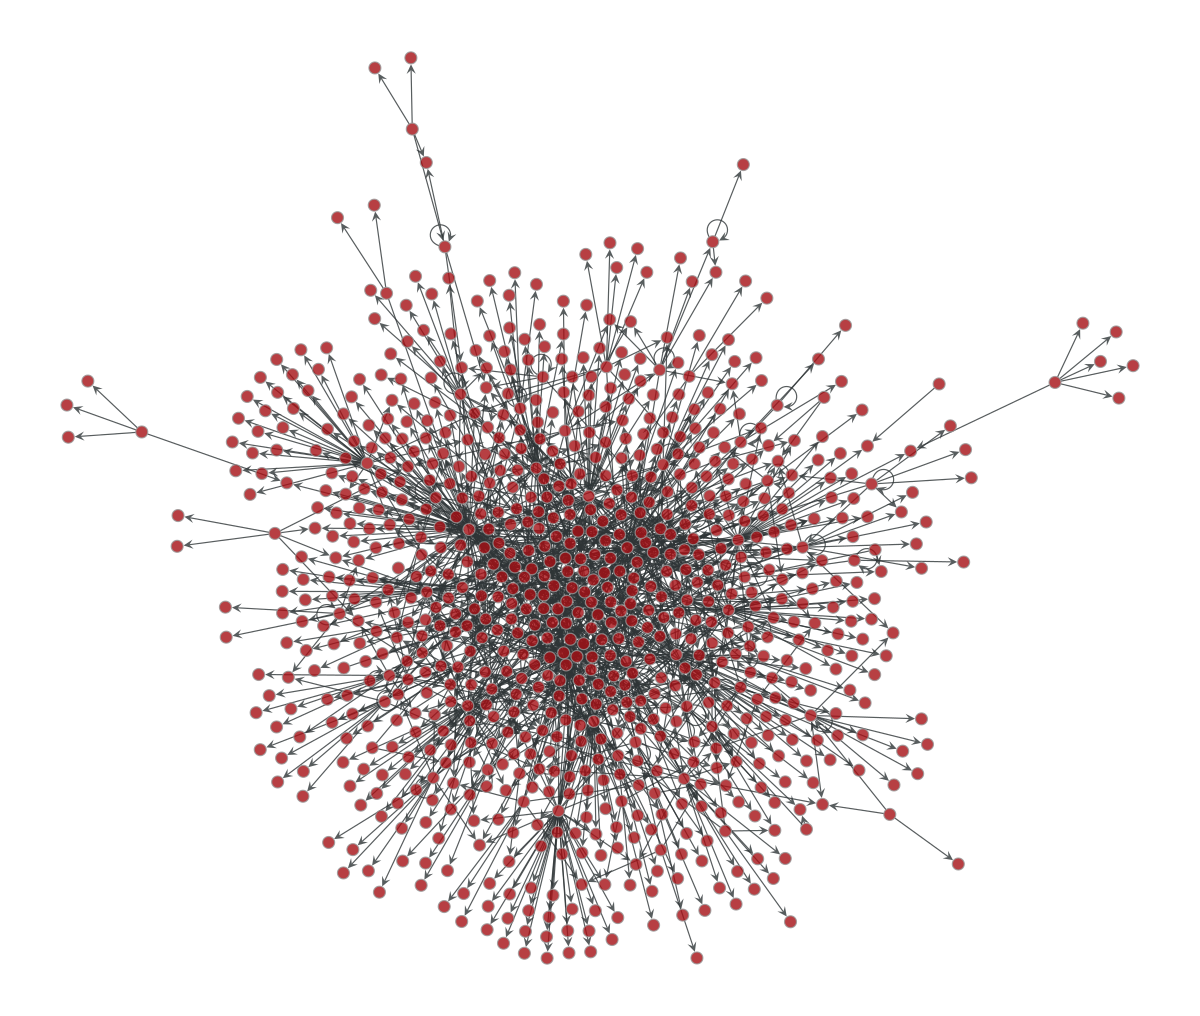

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x29ae7e970, at 0x29ae7e2e0>

In [42]:
gt.graph_draw(g)

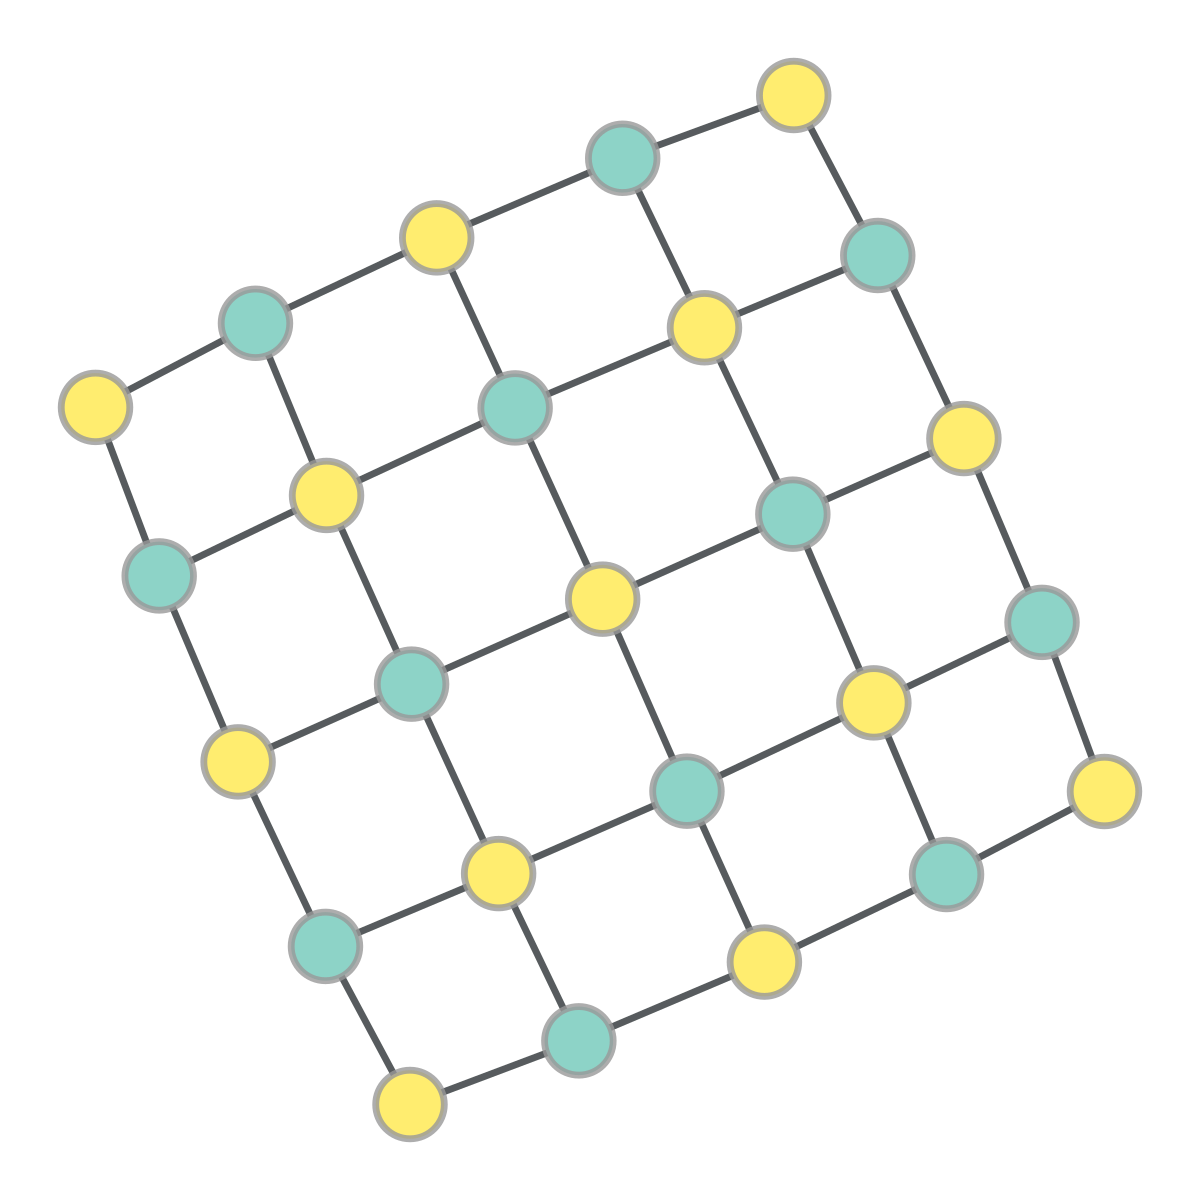

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x297a124f0, at 0x29d6eae50>

In [64]:
g = gt.lattice([5,5])
is_biparitite, part = gt.is_bipartite(g, partition=True)
gt.graph_draw(g, vertex_fill_color=part) 

In [65]:
g

<Graph object, undirected, with 25 vertices and 40 edges, at 0x297a124f0>